In [2]:
library(plotly)
library(maps)
library(dplyr)
library(ggplot2)



In [ ]:
#var: variable to plot, df: dataframe to extract the variable with State full names as 'region' column 
# and County full names as 'subregion' column

USmap_plot<-function (var, data, colors){ 
    county_df <- map_data("county")
    state_df <- map_data("state")

    county_df$subregion <- gsub(" ", "", county_df$subregion)
    
    df<-subset(df, select = c("State", "County", var))

    choropleth <- inner_join(county_df, df, by = c("region", "subregion"))
    choropleth <- choropleth[!duplicated(choropleth$order), ]

    p <- ggplot(choropleth, aes(long, lat, group = group)) +
         geom_polygon(aes(fill = Division, text = paste("Division:", Division)), 
         colour = alpha("white", 1/2), size = 0.1)  +
  geom_polygon(data = state_df, colour = "white", fill = NA) +
  scale_fill_manual(values = colors)+
  theme_void()


    p <- ggplotly(p, tooltip = 'text') %>% 
      layout(
        hovermode = 'x',
        margin = list(
          t = 20,
          b = 20,
          l = 20,
          r = 20),
        legend = list(
          orientation = 'h',
          x = 0.5,
          y = 1.01,
          xanchor = 'center'))

    return (p)
}

In [ ]:
colors=c("East South Central" = 'blue',
         "Pacific" = 'red',
         "Mountain"='yellow',
         "West South Central"='pink',
         "New England"='turquoise',
         "South Atlantic"='orange',
         "East North Central"='green',
          "West North Central"="darkmagenta",
          "Middle Atlantic"="salmon"
  )



In [11]:
library(plotly)
library(maps)
library(dplyr)
library(ggplot2)

county_df <- map_data("county")
state_df <- map_data("state")

#full_df <- read.csv("C:/Users/cathy/Capstone_project_1/Datasets/combined.csv")
#rownames(df) <- df$FIPS

cluster_group <-read.csv('C:/Users/cathy/Capstone_project_1/Datasets/cluster_groups.csv', sep=',',header=T,stringsAsFactors=FALSE)

state_county_name<-read.csv("C:/Users/cathy/Capstone_project_1/Datasets/state_county_name.csv",header=T,stringsAsFactors=FALSE)

ERROR: Error in `[.data.frame`(x, r, vars, drop = drop): undefined columns selected


In [14]:
colnames(cluster_group)

[1] "FIPS"     "clusters"

In [15]:
#state_county_name$FIPS
#rownames(state_county_name)<-state_county_name$FIPS

data<-subset(cluster_group, select = c("FIPS", "clusters"))
county_fips<-subset(state_county_name, select = c("State", "FIPS", "County"))
df<-merge(data, county_fips, by='FIPS')

colnames(df)
#df$county_name

[1] "FIPS"     "clusters" "State"    "County"

In [16]:
df$County %<>%
   
  gsub(" County", "", .) %>%
  gsub(" county", "", .) %>%
  gsub(" parish", "", .) %>%
  gsub(" ", "", .) %>%
  gsub("[.]", "", .)

#df$county_name<-tolower(df$county_name)

county_df$subregion <- gsub(" ", "", county_df$subregion)

colnames(df)<-c("FIPS","clusters","region","subregion")

In [17]:
choropleth <- inner_join(county_df, df, by = c("region", "subregion"))
choropleth <- choropleth[!duplicated(choropleth$order), ]

colors=c("1"='blue',
         "2" = 'red',
         "3"='yellow',
         "4"='pink',
         "5"='turquoise',
         "6"='orange')

In [18]:
library(scales)

p <- ggplot(choropleth, aes(long, lat, group = group)) +
  geom_polygon(aes(fill = clusters), #text = paste("Division:", Division)), 
               colour = alpha("white", 1/2), size = 0.1)  +
  geom_polygon(data = state_df, colour = "white", fill = NA) +
  scale_fill_manual(values = colors)+
  theme_void()


In [19]:
library(devtools)


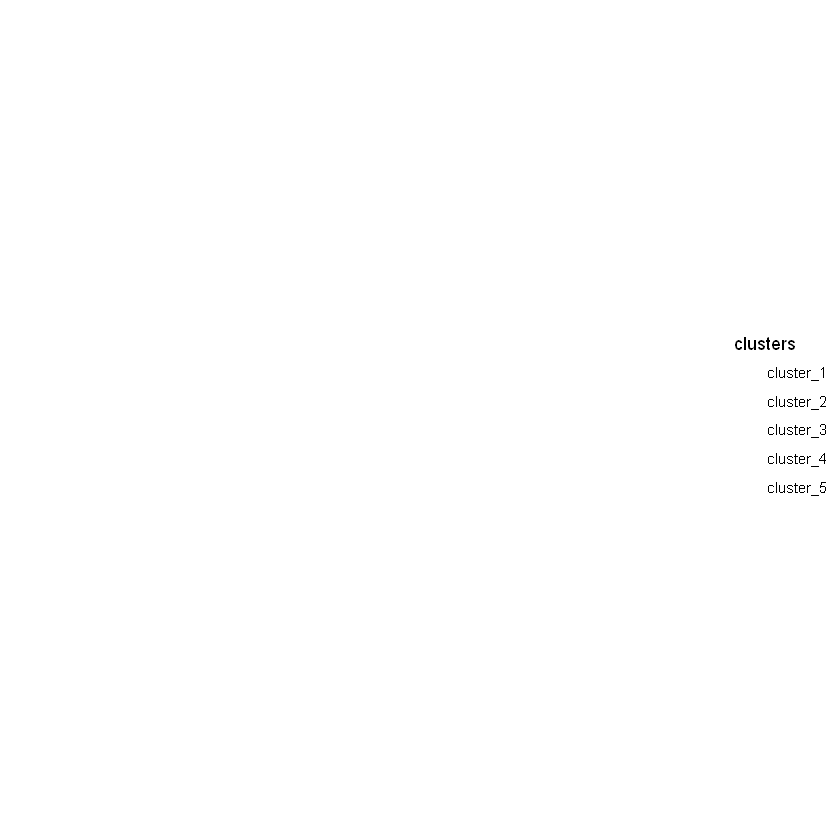

In [20]:
print (p)